## Import the relevant libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import sklearn

## Load the data

In [2]:
data = pd.read_csv('Notebook_1.csv')


data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


## Plot the data

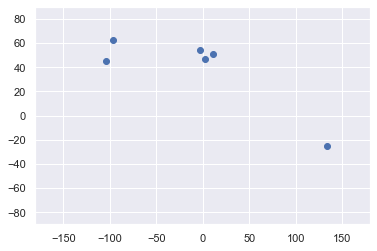

In [3]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

In [16]:
x = data.iloc[:, 1:3]


data['Language'] = data['Language'].map({'English': 0, 'French': 1 , 'German': 2})

data

In [19]:
data.head(5)

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2


## Clustering

In [11]:
km = KMeans(5)

km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [12]:
id_cluster = km.fit_predict(x)

id_cluster 


array([3, 1, 2, 2, 4, 0])

In [13]:
newdf = data.copy()

newdf['pred'] = id_cluster

newdf




,Country,Latitude,Longitude,Language,pred
0,USA,44.97,-103.77,English,3
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,4
5,Australia,-25.45,133.11,English,0


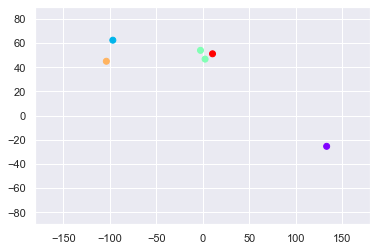

In [14]:
plt.scatter(newdf['Longitude'],newdf['Latitude'], c = newdf['pred'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()